Interpolation in mathematics is the act of adding a value into a series by calculating it from surrounding known values.

There are several general interpolation facilities available in SciPy, for data in 1, 2, and higher dimensions:

A class representing an interpolant (interp1d) in 1-D, offering several interpolation methods.

Convenience function griddata offering a simple interface to interpolation in N dimensions (N = 1, 2, 3, 4, …). Object-oriented interface for the underlying routines is also available.

Functions for 1- and 2-D (smoothed) cubic-spline interpolation, based on the FORTRAN library FITPACK. They are both procedural and object-oriented interfaces for the FITPACK library.

Interpolation using radial basis functions.

### 1-D interpolation (interp1d)

The interp1d class in scipy.interpolate is a convenient method to create a function based on fixed data points, which can be evaluated anywhere within the domain defined by the given data using linear interpolation. An instance of this class is created by passing the 1-D vectors comprising the data. The instance of this class defines a __call__ method and can therefore by treated like a function which interpolates between known data values to obtain unknown values (it also has a docstring for help). Behavior at the boundary can be specified at instantiation time. The following example demonstrates its use, for linear and cubic spline interpolation:

In [8]:
#Setting Environment
import numpy as np
import matplotlib.pyplot as plt

In [9]:
from scipy.interpolate import interp1d

In [10]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')


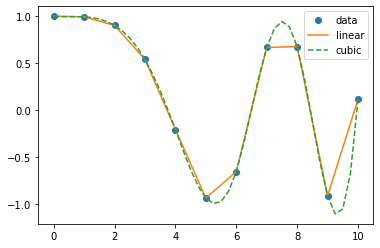

In [7]:
xnew = np.linspace(0, 10, num=41, endpoint=True)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

Another set of interpolations in interp1d is nearest, previous, and next, where they return the nearest, previous, or next point along the x-axis. Nearest and next can be thought of as a special case of a causal interpolating filter. The following example demonstrates their use, using the same data as in the previous example:

In [11]:
from scipy.interpolate import interp1d

In [12]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f1 = interp1d(x, y, kind='nearest')
f2 = interp1d(x, y, kind='previous')
f3 = interp1d(x, y, kind='next')

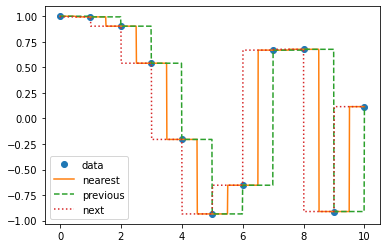

In [13]:
xnew = np.linspace(0, 10, num=1001, endpoint=True)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o')
plt.plot(xnew, f1(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), ':')
plt.legend(['data', 'nearest', 'previous', 'next'], loc='best')
plt.show()

### Multivariate data interpolation (griddata)

Suppose you have multidimensional data, for instance, for an underlying function f(x, y) you only know the values at points (x[i], y[i]) that do not form a regular grid.

Suppose we want to interpolate the 2-D function


In [14]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

on a grid in [0, 1]x[0, 1]

In [15]:
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

but we only know its values at 1000 data points:

In [16]:
rng = np.random.default_rng()
points = rng.random((1000, 2))
values = func(points[:,0], points[:,1])

This can be done with griddata – below, we try out all of the interpolation methods:

In [17]:
from scipy.interpolate import griddata
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

One can see that the exact result is reproduced by all of the methods to some degree, but for this smooth function the piecewise cubic interpolant gives the best results:

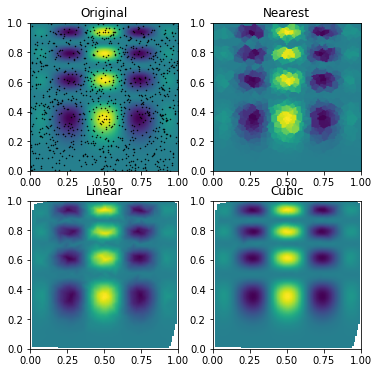

In [18]:
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)
plt.show()

### Spline interpolation

###### Spline interpolation in 1-D: Procedural (interpolate.splXXX)

### Spline interpolation

###### Spline interpolation in 1-D: Procedural (interpolate.splXXX

Once the spline representation of the data has been determined, functions are available for evaluating the spline (splev) and its derivatives (splev, spalde) at any point and the integral of the spline between any two points ( splint). In addition, for cubic splines ( k = 3 ) with 8 or more knots, the roots of the spline can be estimated ( sproot). These functions are demonstrated in the example that follows.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

Cubic-spline

In [20]:
x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)
y = np.sin(x)
tck = interpolate.splrep(x, y, s=0)
xnew = np.arange(0, 2*np.pi, np.pi/50)
ynew = interpolate.splev(xnew, tck, der=0)

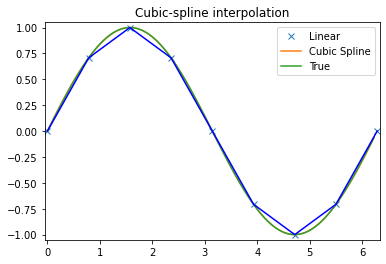

In [21]:
plt.figure()
plt.plot(x, y, 'x', xnew, ynew, xnew, np.sin(xnew), x, y, 'b')
plt.legend(['Linear', 'Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Cubic-spline interpolation')
plt.show()

Derivative of spline

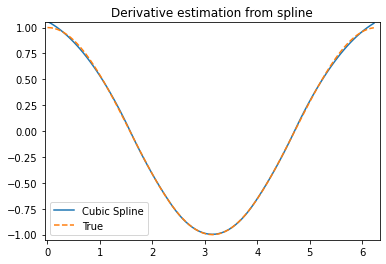

In [22]:
yder = interpolate.splev(xnew, tck, der=1)
plt.figure()
plt.plot(xnew, yder, xnew, np.cos(xnew),'--')
plt.legend(['Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Derivative estimation from spline')
plt.show()

All derivatives of spline

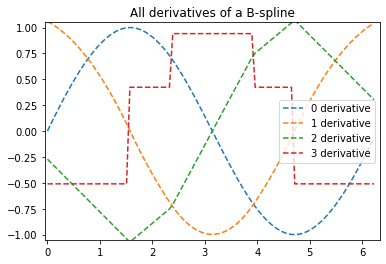

In [23]:
yders = interpolate.spalde(xnew, tck)
plt.figure()
for i in range(len(yders[0])):
   plt.plot(xnew, [d[i] for d in yders], '--', label=f"{i} derivative")
plt.legend()
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('All derivatives of a B-spline')
plt.show()

Integral of spline

In [24]:
def integ(x, tck, constant=-1):
    x = np.atleast_1d(x)
    out = np.zeros(x.shape, dtype=x.dtype)
    for n in range(len(out)):
        out[n] = interpolate.splint(0, x[n], tck)
    out += constant
    return out

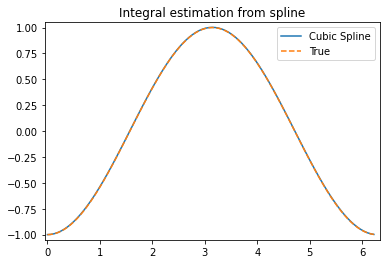

In [25]:
yint = integ(xnew, tck)
plt.figure()
plt.plot(xnew, yint, xnew, -np.cos(xnew), '--')
plt.legend(['Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Integral estimation from spline')
plt.show()

Roots of spline

In [27]:
interpolate.sproot(tck)


array([3.14159265])

Notice that sproot failed to find an obvious solution at the edge of the approximation interval,x =0 . If we define the spline on a slightly larger interval, we recover both roots x=0  and x = 2 * pi:

In [28]:
x = np.linspace(-np.pi/4, 2.*np.pi + np.pi/4, 21)
y = np.sin(x)
tck = interpolate.splrep(x, y, s=0)
interpolate.sproot(tck)

array([0.        , 3.14159265, 6.28318531])

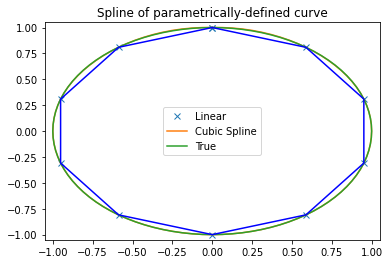

In [29]:
t = np.arange(0, 1.1, .1)
x = np.sin(2*np.pi*t)
y = np.cos(2*np.pi*t)
tck, u = interpolate.splprep([x, y], s=0)
unew = np.arange(0, 1.01, 0.01)
out = interpolate.splev(unew, tck)
plt.figure()
plt.plot(x, y, 'x', out[0], out[1], np.sin(2*np.pi*unew), np.cos(2*np.pi*unew), x, y, 'b')
plt.legend(['Linear', 'Cubic Spline', 'True'])
plt.axis([-1.05, 1.05, -1.05, 1.05])
plt.title('Spline of parametrically-defined curve')
plt.show()

### Spline interpolation in 1-d: Object-oriented (UnivariateSpline)

The spline-fitting capabilities described above are also available via an objected-oriented interface. The 1-D splines are objects of the UnivariateSpline class, and are created with the x and y components of the curve provided as arguments to the constructor. The class defines __call__, allowing the object to be called with the x-axis values, at which the spline should be evaluated, returning the interpolated y-values. This is shown in the example below for the subclass InterpolatedUnivariateSpline. The integral, derivatives, and roots methods are also available on UnivariateSpline objects, allowing definite integrals, derivatives, and roots to be computed for the spline.




The UnivariateSpline class can also be used to smooth data by providing a non-zero value of the smoothing parameter s, with the same meaning as the s keyword of the splrep function described above. This results in a spline that has fewer knots than the number of data points, and hence is no longer strictly an interpolating spline, but rather a smoothing spline. If this is not desired, the InterpolatedUnivariateSpline class is available. It is a subclass of UnivariateSpline that always passes through all points (equivalent to forcing the smoothing parameter to 0). This class is demonstrated in the example below.


The LSQUnivariateSpline class is the other subclass of UnivariateSpline. It allows the user to specify the number and location of internal knots explicitly with the parameter t. This allows for the creation of customized splines with non-linear spacing, to interpolate in some domains and smooth in others, or change the character of the spline.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

InterpolatedUnivariateSpline

In [32]:
x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)
y = np.sin(x)
s = interpolate.InterpolatedUnivariateSpline(x, y)
xnew = np.arange(0, 2*np.pi, np.pi/50)
ynew = s(xnew)

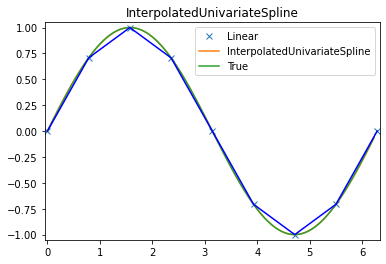

In [33]:
plt.figure()
plt.plot(x, y, 'x', xnew, ynew, xnew, np.sin(xnew), x, y, 'b')
plt.legend(['Linear', 'InterpolatedUnivariateSpline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('InterpolatedUnivariateSpline')
plt.show()

LSQUnivarateSpline with non-uniform knots

In [34]:
t = [np.pi/2-.1, np.pi/2+.1, 3*np.pi/2-.1, 3*np.pi/2+.1]
s = interpolate.LSQUnivariateSpline(x, y, t, k=2)
ynew = s(xnew)

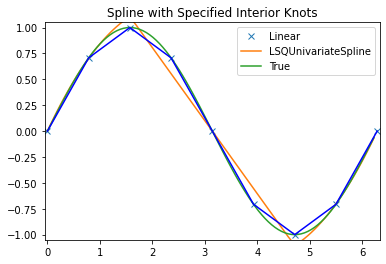

In [35]:
plt.figure()
plt.plot(x, y, 'x', xnew, ynew, xnew, np.sin(xnew), x, y, 'b')
plt.legend(['Linear', 'LSQUnivariateSpline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Spline with Specified Interior Knots')
plt.show()

### 2-D spline representation: Procedural (bisplrep)

To evaluate the 2-D spline and its partial derivatives (up to the order of the spline), the function bisplev is required. This function takes as the first two arguments two 1-D arrays whose cross-product specifies the domain over which to evaluate the spline. The third argument is the tck list returned from bisplrep. If desired, the fourth and fifth arguments provide the orders of the partial derivative in the x and y direction, respectively.



It is important to note that 2-D interpolation should not be used to find the spline representation of images. The algorithm used is not amenable to large numbers of input points. The signal-processing toolbox contains more appropriate algorithms for finding the spline representation of an image. The 2-D interpolation commands are intended for use when interpolating a 2-D function as shown in the example that follows. This example uses the mgrid command in NumPy which is useful for defining a “mesh-grid” in many dimensions. (See also the ogrid command if the full-mesh is not needed). The number of output arguments and the number of dimensions of each argument is determined by the number of indexing objects passed in mgrid.

In [36]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

Define function over a sparse 20x20 grid

In [37]:
x_edges, y_edges = np.mgrid[-1:1:21j, -1:1:21j]
x = x_edges[:-1, :-1] + np.diff(x_edges[:2, 0])[0] / 2.
y = y_edges[:-1, :-1] + np.diff(y_edges[0, :2])[0] / 2.
z = (x+y) * np.exp(-6.0*(x*x+y*y))

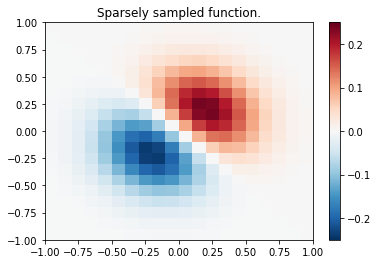

In [38]:
plt.figure()
lims = dict(cmap='RdBu_r', vmin=-0.25, vmax=0.25)
plt.pcolormesh(x_edges, y_edges, z, shading='flat', **lims)
plt.colorbar()
plt.title("Sparsely sampled function.")
plt.show()

Interpolate function over a new 70x70 grid

In [39]:
xnew_edges, ynew_edges = np.mgrid[-1:1:71j, -1:1:71j]
xnew = xnew_edges[:-1, :-1] + np.diff(xnew_edges[:2, 0])[0] / 2.
ynew = ynew_edges[:-1, :-1] + np.diff(ynew_edges[0, :2])[0] / 2.
tck = interpolate.bisplrep(x, y, z, s=0)
znew = interpolate.bisplev(xnew[:,0], ynew[0,:], tck)

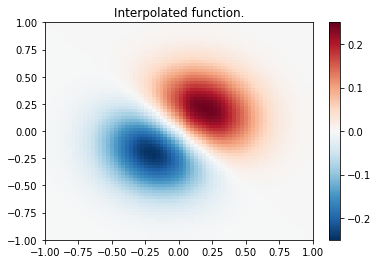

In [40]:
plt.figure()
plt.pcolormesh(xnew_edges, ynew_edges, znew, shading='flat', **lims)
plt.colorbar()
plt.title("Interpolated function.")
plt.show()

#### 2-D spline representation: Object-oriented (BivariateSpline)

The BivariateSpline class is the 2-D analog of the UnivariateSpline class. It and its subclasses implement the FITPACK functions described above in an object-oriented fashion, allowing objects to be instantiated that can be called to compute the spline value by passing in the two coordinates as the two arguments.

### Using radial basis functions for smoothing/interpolation

Radial basis functions can be used for smoothing/interpolating scattered data in N dimensions, but should be used with caution for extrapolation outside of the observed data range.

### 1-D Example

This example compares the usage of the Rbf and UnivariateSpline classes from the scipy.interpolate module.

In [41]:
import numpy as np
from scipy.interpolate import Rbf, InterpolatedUnivariateSpline
import matplotlib.pyplot as plt

In [42]:
# setup data
x = np.linspace(0, 10, 9)
y = np.sin(x)
xi = np.linspace(0, 10, 101)

In [43]:
# use fitpack2 method
ius = InterpolatedUnivariateSpline(x, y)
yi = ius(xi)

Text(0.5, 1.0, 'Interpolation using univariate spline')

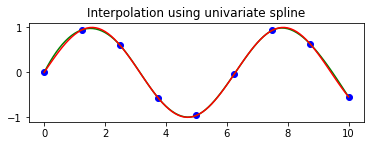

In [44]:
plt.subplot(2, 1, 1)
plt.plot(x, y, 'bo')
plt.plot(xi, yi, 'g')
plt.plot(xi, np.sin(xi), 'r')
plt.title('Interpolation using univariate spline')

In [45]:
# use RBF method
rbf = Rbf(x, y)
fi = rbf(xi)

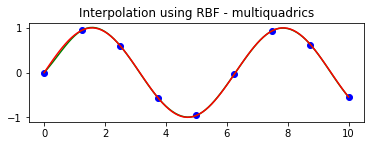

In [46]:
plt.subplot(2, 1, 2)
plt.plot(x, y, 'bo')
plt.plot(xi, fi, 'g')
plt.plot(xi, np.sin(xi), 'r')
plt.title('Interpolation using RBF - multiquadrics')
plt.show()

### 2-D Example

This example shows how to interpolate scattered 2-D data:

In [47]:
import numpy as np
from scipy.interpolate import Rbf
import matplotlib.pyplot as plt
from matplotlib import cm

In [48]:
# 2-d tests - setup scattered data
rng = np.random.default_rng()
x = rng.random(100)*4.0-2.0
y = rng.random(100)*4.0-2.0
z = x*np.exp(-x**2-y**2)
edges = np.linspace(-2.0, 2.0, 101)
centers = edges[:-1] + np.diff(edges[:2])[0] / 2.
XI, YI = np.meshgrid(centers, centers)

In [49]:
# use RBF
rbf = Rbf(x, y, z, epsilon=2)
ZI = rbf(XI, YI)

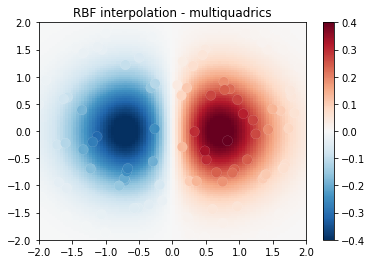

In [50]:
# plot the result
plt.subplot(1, 1, 1)
X_edges, Y_edges = np.meshgrid(edges, edges)
lims = dict(cmap='RdBu_r', vmin=-0.4, vmax=0.4)
plt.pcolormesh(X_edges, Y_edges, ZI, shading='flat', **lims)
plt.scatter(x, y, 100, z, edgecolor='w', lw=0.1, **lims)
plt.title('RBF interpolation - multiquadrics')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.colorbar()